In [ ]:
!pip install ydata-profiling
!pip install hvplot
!pip install hiplot

In [ ]:
import pandas as pd

import hvplot.pandas
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from ydata_profiling import ProfileReport

import hiplot as hip # Interactive parallel coordinates plot

In [ ]:
data = pd.read_csv("https://gist.githubusercontent.com/fandras/44a74003801090b60b3720adb6a3ff24/raw/5a0848db1036e2f37b0dc8b8f2afa2766785fc53/rom.csv")
data.head()

,ip,RT,RPT,RTT,location,client.type,DC,start.time,pm.pa,Country,Time
0,10.8.146.179 (laptop),2656.0,1031.0,1625.0,Newcastle,Microsoft client,Redmond DC,1.359748e+09,PM,UK,0
1,10.8.146.179 (laptop),1469.0,719.0,750.0,Newcastle,Microsoft client,Redmond DC,1.359749e+09,PM,UK,0
2,10.8.146.179 (laptop),1984.0,844.0,1140.0,Newcastle,Microsoft client,Redmond DC,1.359749e+09,PM,UK,0
3,10.8.146.179 (laptop),2437.0,734.0,1703.0,Newcastle,Microsoft client,Redmond DC,1.359749e+09,PM,UK,0
4,10.8.146.179 (laptop),1859.0,750.0,1109.0,Newcastle,Microsoft client,Redmond DC,1.359749e+09,PM,UK,0


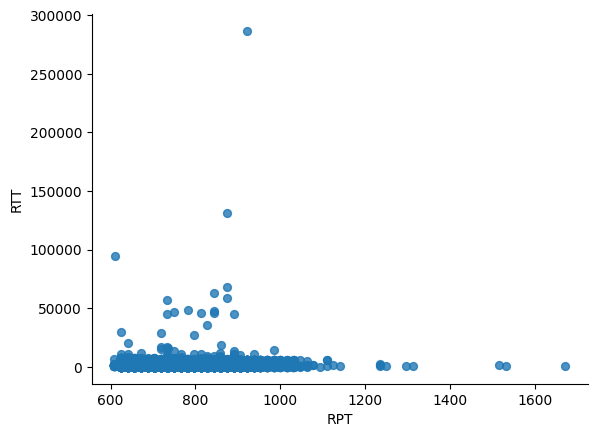

In [ ]:
# @title RPT vs RTT

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='RPT', y='RTT', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

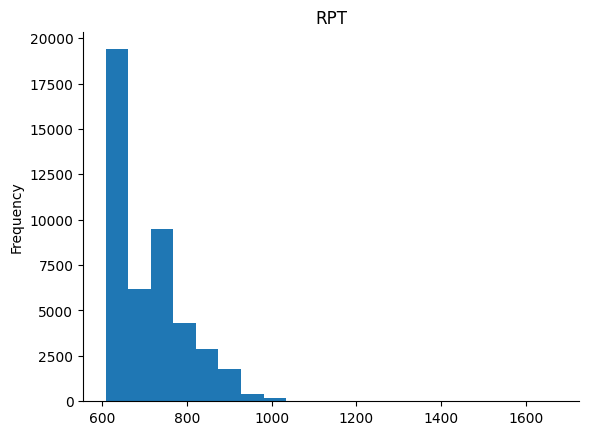

In [ ]:
# @title RPT
# @markdown Description

from matplotlib import pyplot as plt
data['RPT'].plot(kind='hist', bins=20, title='RPT')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.describe()

,RT,RPT,RTT,start.time,Time
count,44593.000000,44594.000000,44594.000000,4.460800e+04,44608.00000
mean,2011.365909,709.033659,1302.312015,1.359787e+09,-4.03125
std,2211.400245,83.151039,2207.917058,2.496665e+04,2.44293
min,613.000000,609.000000,-43.000000,1.359743e+09,-8.00000
25%,1253.000000,640.000000,532.000000,1.359765e+09,-5.00000
50%,1715.000000,688.000000,1015.000000,1.359787e+09,-5.00000
75%,2088.000000,750.000000,1401.000000,1.359808e+09,-3.75000
max,287448.000000,1672.000000,286526.000000,1.359830e+09,0.00000


In [ ]:
profile = ProfileReport(data, title="Profiling Report")
profile

In [ ]:
# NaN values
def nans(df):
    return df[df.isnull().any(axis=1)]

nan_data = nans(data)
nan_data

,ip,RT,RPT,RTT,location,client.type,DC,start.time,pm.pa,Country,Time
1175,10.8.146.179 (laptop),NaN,672.0,437.0,Newcastle,Microsoft client,Redmond DC,1.359821e+09,PM,UK,0
2578,10.8.146.179 (laptop),NaN,NaN,NaN,Newcastle,Microsoft client,Dublin DC,1.359761e+09,AM,UK,0
2586,10.8.146.179 (laptop),NaN,NaN,NaN,Newcastle,Microsoft client,Dublin DC,1.359761e+09,AM,UK,0
2594,10.8.146.179 (laptop),NaN,NaN,NaN,Newcastle,Microsoft client,Dublin DC,1.359762e+09,AM,UK,0
2602,10.8.146.179 (laptop),NaN,NaN,NaN,Newcastle,Microsoft client,Dublin DC,1.359762e+09,AM,UK,0
4648,10.8.146.179 (laptop),NaN,NaN,NaN,Newcastle,Microsoft client,Dublin DC,1.359821e+09,PM,UK,0
8739,204.14.93.62,NaN,NaN,NaN,Secaucus,Java client,Dublin DC,1.359767e+09,AM,USA,-5
10100,208.87.24.149,NaN,NaN,NaN,Secaucus,Java client,Dublin DC,1.359765e+09,AM,USA,-5
23667,64.151.226.119,NaN,NaN,NaN,Burnaby (Canada),Java client,Dublin DC,1.359823e+09,PM,Canada,-8
23772,64.20.37.202,NaN,NaN,NaN,Secaucus,Java client,Dublin DC,1.359748e+09,PM,USA,-5


In [ ]:
# Skewness

skewness_warning_list = list()

for col_name in list(data.select_dtypes('number').columns):
    if data[col_name].skew() > 0.9:
        skewness_warning_list.append(col_name)

# data.skew()
print(skewness_warning_list)

['RT', 'RPT', 'RTT']


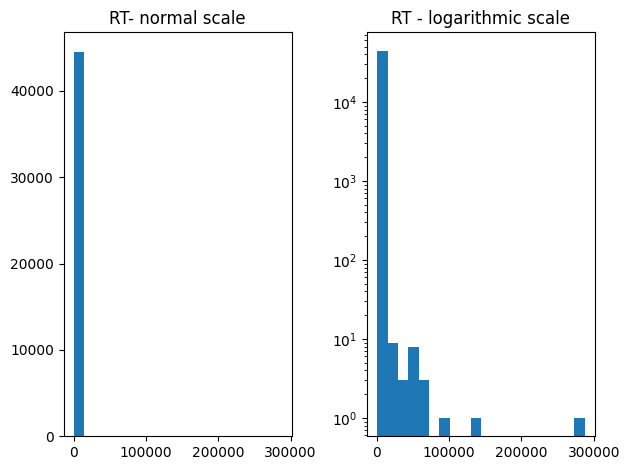

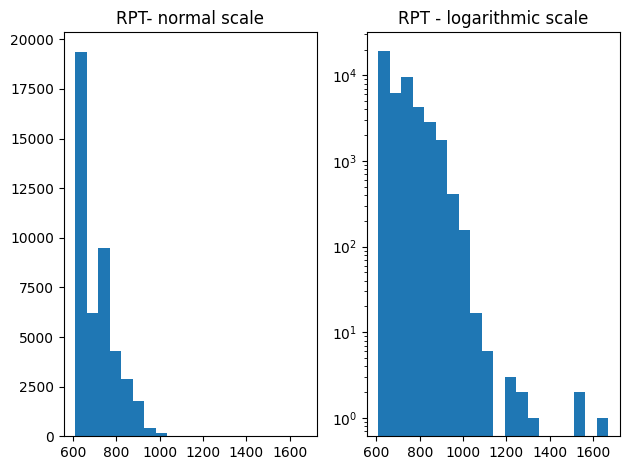

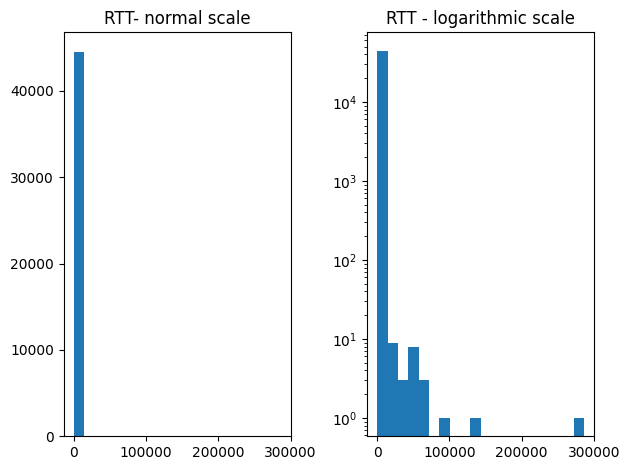

In [ ]:
for skewness_warning in skewness_warning_list:
    fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)
    axs[0].set_title(str(skewness_warning) + '- normal scale')
    axs[0].hist(data[skewness_warning], bins=20)
    axs[1].set_title(str(skewness_warning) + ' - logarithmic scale')
    axs[1].set_yscale('log')
    axs[1].hist(data[skewness_warning], bins=20)
    fig.show

In [ ]:
explorer = data.hvplot.explorer(x='RPT', y='RTT', by=['ip'])
explorer

hvDataFrameExplorer(advanced=Advanced(explorer=..., name='Advanced00839', opts=None), axes=Axes(explorer=..., height=None, legend='bottom_right', logx=False, logy=False, name='Axes00833', responsive=True, shared_axes=True, width=None, xlim=None, ylim=None), by=['ip'], code="df.hvplot(\n    by=['ip'],\n    kind='scatter',\n    x='RPT',\n    y=['RTT'],\n    legend='bottom_right',\n    widget_location='bottom',\n)", colormapping=Colormapping(clim=None, cmap='kbc_r', cnorm='linear', color=None, colorbar=None, explorer=..., name='Colormapping00834', rescale_discrete_levels=True, symmetric=False), geographic=Geographic(crs=None, crs_kwargs={}, explorer=..., feature_scale='110m', features=None, geo=False, global_extent=None, name='Geographic00836', project=False, projection=None, projection_kwargs={}, tiles=None), groupby=[], kind='scatter', labels=Labels(clabel='', explorer=..., fontscale=1, name='Labels00835', rot=0, title='', xlabel='', ylabel=''), name='hvDataFrameExplorer00811', operations=Operations(aggregator=None, datashade=False, dynspread=False, explorer=..., name='Operations00837', rasterize=False, x_sampling=None, y_sampling=None), statusbar=StatusBar(live_update=True, name='StatusBar00826'), style=Style(alpha=1, explorer=..., name='Style00838'), x='RPT', y='RTT', y_multi=['RTT'], z=None)

In [ ]:
# Dropping NaN values
if data.isnull().values.any():
    data = data.dropna()


# Filtering negative and the one extreme value

data = data.sort_values(by=['RTT'], ascending=True)
data = data.drop(data.index[-1])
data = data.drop(data.index[0])

data.head(5)

,ip,RT,RPT,RTT,location,client.type,DC,start.time,pm.pa,Country,Time
2555,10.8.146.179 (laptop),828.0,766.0,62.0,Newcastle,Microsoft client,Dublin DC,1.359759e+09,PM,UK,0
2647,10.8.146.179 (laptop),781.0,719.0,62.0,Newcastle,Microsoft client,Dublin DC,1.359765e+09,AM,UK,0
4890,10.8.146.179 (laptop),906.0,844.0,62.0,Newcastle,Microsoft client,Dublin DC,1.359791e+09,AM,UK,0
2688,10.8.146.179 (laptop),719.0,656.0,63.0,Newcastle,Microsoft client,Dublin DC,1.359768e+09,AM,UK,0
2446,10.8.146.179 (laptop),766.0,703.0,63.0,Newcastle,Microsoft client,Dublin DC,1.359753e+09,PM,UK,0


In [ ]:
par_df = data[["location", "client.type", "DC", "RTT", "RPT", "RT","ip"]]
hip.Experiment.from_dataframe(par_df).display()

In [ ]:
fig = px.box(data, y="RTT", log_y=True)
fig.show()

In [ ]:
separation_value_0 = 62
separation_value_1 = 35562
separation_value_2 = 3367

faulty_data = data[data['RTT']>separation_value_1]
faulty_data = faulty_data.assign(label=0)
low_data = data[data['RTT']<separation_value_2]
low_data = low_data.assign(label=2)
normal_data = data[data['RTT']>separation_value_2]
normal_data = normal_data[normal_data['RTT']<separation_value_1]
normal_data = normal_data.assign(label=1)

frames = [faulty_data, low_data, normal_data]
labeled_data = pd.concat(frames)

In [ ]:
fig = px.scatter(labeled_data, x="location", y="RTT", color="label", color_continuous_scale=[(0, "red"), (0.5, "blue"), (1, "green")])
fig.show()

In [ ]:
aggregated_data = labeled_data.groupby('ip').agg(rtt_median = ('RTT','median')).reset_index()
aggregated_data

,ip,rtt_median
0,10.8.146.179 (laptop),577.0
1,10.8.151.10 (Desktop),423.0
2,204.14.93.62,1240.0
3,208.87.24.149,1283.0
4,208.87.25.162,1250.0
5,209.188.85.60,971.5
6,213.175.197.136,953.0
7,216.151.172.42,1005.5
8,64.151.226.119,1183.5
9,64.20.37.202,968.0


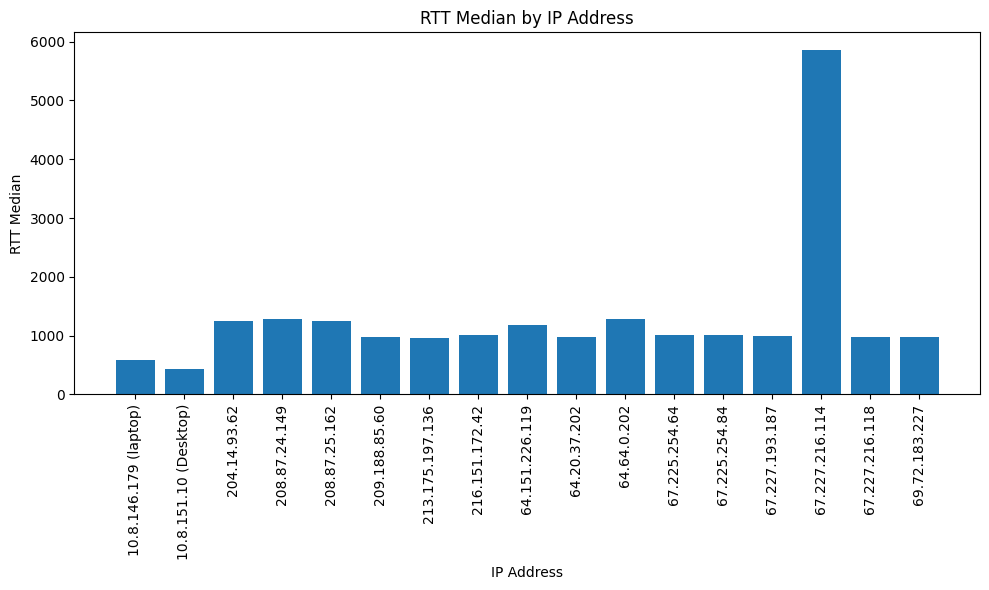

In [ ]:
# prompt: Using dataframe aggregated_data: create a plot of the rtt_median by the ips

import matplotlib.pyplot as plt

# Create a bar plot of rtt_median by ip
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(aggregated_data['ip'], aggregated_data['rtt_median'])
plt.xlabel('IP Address')
plt.ylabel('RTT Median')
plt.title('RTT Median by IP Address')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability if needed
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()